
Esta sección importa las bibliotecas necesarias para el análisis de datos y la creación de modelos:
- Pandas y NumPy para manipulación de datos
- Matplotlib y Seaborn para visualización
- Scikit-learn para modelado y evaluación de machine learning

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns



Aquí se carga el conjunto de datos de casas de Nueva York y se realiza una exploración inicial:
1. Se muestra las primeras filas del DataFrame
2. Se obtiene información sobre las columnas y tipos de datos
3. Se generan estadísticas descriptivas de las variables numéricas

In [9]:
#Cargamos la bd
data = pd.read_csv('https://raw.githubusercontent.com/lizsolano/Optativa_profesionalizante_I/refs/heads/main/NY-House-Dataset.csv',sep = ',')#
#data = pd.read_csv("C:/Users/Lizeth Solano Romo/OneDrive - Universidad Autónoma de Aguascalientes/2024/MATERIAS/agosto-diciembre/LITC/7o/Ejercicios Phyton/NY-House-Dataset.csv")


In [10]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

# Realizamos el analisis exploratorio:
##Conteo de categorias

In [48]:
print(data["BROKERTITLE"].value_counts())
print(data["TYPE"].value_counts())
print(data["STATE"].value_counts())
print(data["LOCALITY"].value_counts())
print(data["PROPERTYSQFT"].value_counts())
print(data["SUBLOCALITY"].value_counts())

BROKERTITLE
No se especifica                                         2000
Brokered by COMPASS                                       456
Brokered by Douglas Elliman - 575 Madison Ave             110
Brokered by Brown Harris Stevens                           93
Brokered by Corcoran East Side                             91
                                                         ... 
Brokered by Brown Harris Stevens- 3531 Johnson Avenue      10
Brokered by Bond New York- Columbus Circle                 10
Brokered by Douglas Elliman - Franklin Square              10
Brokered by R New York                                     10
Brokered by Coldwell Banker Reliable                       10
Name: count, Length: 97, dtype: int64
TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale     

##descripcion de variables numericas:

In [12]:
print(data[["PRICE","BEDS","BATH","PROPERTYSQFT"]].describe())

              PRICE         BEDS         BATH  PROPERTYSQFT
count  4.801000e+03  4801.000000  4801.000000   4801.000000
mean   2.356940e+06     3.356801     2.373861   2184.207862
std    3.135525e+07     2.602315     1.946962   2377.140894
min    2.494000e+03     1.000000     0.000000    230.000000
25%    4.990000e+05     2.000000     1.000000   1200.000000
50%    8.250000e+05     3.000000     2.000000   2184.207862
75%    1.495000e+06     4.000000     3.000000   2184.207862
max    2.147484e+09    50.000000    50.000000  65535.000000


#Transformar categorias con menos de 10 registros a una nueva:
## BROKERTITLE,TYPE,STATE,CP,STATE_2,CODIGO_POSTAL,LOCALLITY, SUBLOCALLITY

In [18]:
BROKERTITLE_conteo = data["BROKERTITLE"].value_counts()
BROKERTITLE_conservar = BROKERTITLE_conteo[BROKERTITLE_conteo>=10].index.to_list()
data["BROKERTITLE"]=np.where(data["BROKERTITLE"].isin(BROKERTITLE_conservar),data["BROKERTITLE"],"No se especifica")

#TYPE
TYPE_conteo = data["TYPE"].value_counts()
TYPE_conservar = TYPE_conteo[TYPE_conteo>=10].index.to_list()
data["TYPE"]=np.where(data["TYPE"].isin(TYPE_conservar),data["TYPE"],"No se especifica")

#STATE Y CP
data["STATE_2"]=data["STATE"].str.extract("^([^,]+)")
data["codigo_postal"]=data["STATE"].str.extractall("(\d+)").groupby(level=0).apply(lambda x: x.iloc[-1])

#STATE_2
STATE_2_conteo = data["STATE_2"].value_counts()
STATE_2_conservar = STATE_2_conteo[STATE_2_conteo>=10].index.to_list()
data["STATE_2"]=np.where(data["STATE_2"].isin(STATE_2_conservar),data["STATE_2"],"No se especifica")

#codigo_postal
codigo_postal_conteo = data["codigo_postal"].value_counts()
codigo_postal_conservar = codigo_postal_conteo[codigo_postal_conteo>=10].index.to_list()
data["codigo_postal"]=np.where(data["codigo_postal"].isin(codigo_postal_conservar),data["codigo_postal"],"No se especifica")

#LOCALITY
LOCALITY_conteo = data["LOCALITY"].value_counts()
LOCALITY_conservar = LOCALITY_conteo[LOCALITY_conteo>=10].index.to_list()
data["LOCALITY"]=np.where(data["LOCALITY"].isin(LOCALITY_conservar),data["LOCALITY"],"No se especifica")


#SUBLOCALITY
SUBLOCALITY_conteo = data["SUBLOCALITY"].value_counts()
SUBLOCALITY_conservar = SUBLOCALITY_conteo[SUBLOCALITY_conteo>=10].index.to_list()
data["SUBLOCALITY"]=np.where(data["SUBLOCALITY"].isin(SUBLOCALITY_conservar),data["SUBLOCALITY"],"No se especifica")

#TABLA DESCRIPTIVA:

In [19]:
Tabla_Descriptiva_Final = data.groupby(['TYPE','STATE_2','codigo_postal','LOCALITY','SUBLOCALITY']).agg(
  CONTEO=('TYPE','count'),
  PROMEDIO_PRICE=('PRICE','mean'),
  DESVIACION_PRICE=('PRICE','std'),
  PROMEDIO_BEDS=('BEDS','mean'),
  DESVIACION_BEDS=('BEDS','std'),
  PROMEDIO_BATH=('BATH','mean'),
  DESVIACION_BATH=('BATH','std'),
  PROMEDIO_PROPERTYSQFT=('PROPERTYSQFT','mean'),
  DESVIACION_PROPERTYSQFT=('PROPERTYSQFT','std')
).reset_index()

In [20]:
print(Tabla_Descriptiva_Final)

                    TYPE        STATE_2 codigo_postal       LOCALITY  \
0         Co-op for sale        Astoria         11101  Queens County   
1         Co-op for sale        Astoria         11105  Queens County   
2         Co-op for sale        Astoria         11106  Queens County   
3         Co-op for sale        Bayside         11360   Kings County   
4         Co-op for sale        Bayside         11360  Queens County   
...                  ...            ...           ...            ...   
1174  Townhouse for sale  Staten Island         10309       New York   
1175  Townhouse for sale  Staten Island         10310       New York   
1176  Townhouse for sale  Staten Island         10312       New York   
1177  Townhouse for sale  Staten Island         10314       New York   
1178  Townhouse for sale       Woodside         11377       New York   

          SUBLOCALITY  CONTEO  PROMEDIO_PRICE  DESVIACION_PRICE  \
0              Queens       2   270000.000000          0.000000   
1

Elimina los datos nulos de la base de datos

In [30]:
data = data.dropna()


#Modelo


### Gráfico de dispersión que muestra la relación entre el tamaño y el precio de venta

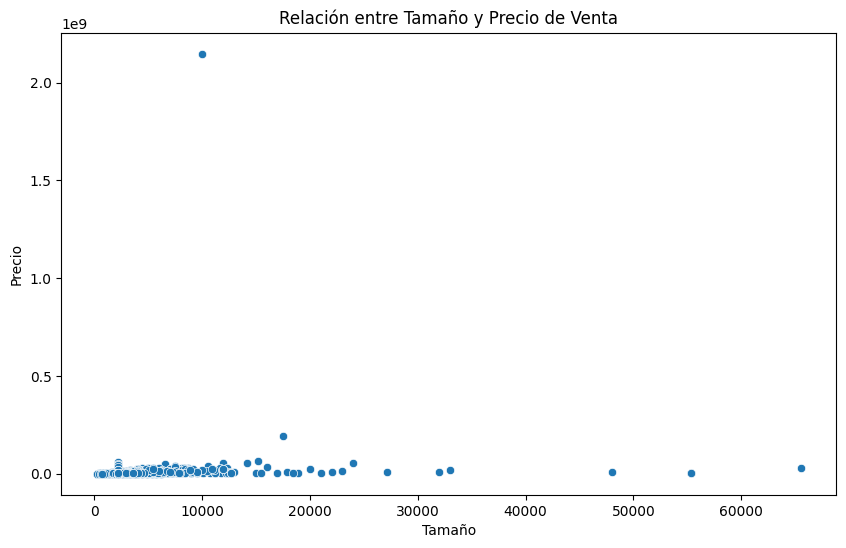

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df)
plt.title('Relación entre Tamaño y Precio de Venta')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.show()

Se propone un modelo y su evaluación:
1. Se divide el conjunto de datos en entrenamiento y prueba.
2. Se crea y entrena un modelo de regresión lineal.
3. Se hacen predicciones y se evalúa el rendimiento del modelo.

La ***regresión lineal*** es una técnica estadística fundamental utilizada para modelar la relación entre variables y hacer predicciones.

Es un método estadístico que busca establecer una relación lineal entre una variable dependiente (Y) y una o más variables independientes (X). En su forma más simple, se representa mediante la ecuación:

Y = β₀ + β₁X + ε

Donde:

β₀ es la intersección con el eje Y

β₁ es la pendiente de la línea

ε es el término de error


Sirve para:

- **Predicción:** Permite hacer pronósticos sobre la variable dependiente basándose en los valores de las variables independientes.
- **Análisis de relaciones:** Ayuda a entender cómo cambia la variable dependiente cuando se modifican las variables independientes.
- **Identificación de tendencias:** Permite detectar patrones y tendencias en los datos.
- **Cuantificación de impactos:** Mide el efecto que tienen las variables independientes sobre la variable dependiente.

**En qué casos se utiliza**

La regresión lineal se aplica en diversos campos y situaciones, como:
- Economía y finanzas: Para predecir ventas, analizar el impacto de variables económicas, o estimar el valor de activos.
- Ciencias sociales: En estudios que buscan relacionar factores socioeconómicos con diversos resultados.
- Medicina: Para analizar la relación entre dosis de medicamentos y respuestas fisiológicas.
- Marketing: En la predicción de comportamientos de consumo o efectividad de campañas publicitarias.
- Ingeniería: Para modelar relaciones entre variables en sistemas físicos.
- Ciencias ambientales: En el estudio de fenómenos climáticos o ecológicos.
- Recursos humanos: Para analizar factores que influyen en el desempeño o satisfacción laboral.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'R-cuadrado: {r2}')

Error cuadrático medio: 19243479524898.84
R-cuadrado: 0.23621329447296957


Interpretando:
- Error cuadrático medio (MSE): 19243479524898.84
El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor más bajo indica mejores predicciones.
En este caso, el MSE es bastante alto, lo que sugiere que hay una discrepancia significativa entre los precios predichos y los reales. Sin embargo, es importante notar que el MSE está en la misma escala que el cuadrado de los precios de las casas, por lo que un número grande no es necesariamente inusual para datos de precios de propiedades.
- R-cuadrado (R²): 0.23621329447296957
El R² indica qué proporción de la varianza en la variable dependiente (precio de venta) es predecible a partir de las variables independientes (características de la casa). Varía de 0 a 1, donde 1 indica una predicción perfecta.
Un R² de aproximadamente 0.236 significa que el modelo explica alrededor del 23.6% de la variabilidad en los precios de las casas. Esto sugiere que:
1. El modelo tiene cierto poder predictivo, ya que explica más del 0% de la varianza.
2. Sin embargo, hay una gran parte de la variabilidad (aproximadamente el 76.4%) que el modelo no explica.

**Interpretación general:** Estos resultados indican que el modelo tiene un poder predictivo limitado. Aunque puede capturar algunas tendencias en los datos, hay muchos factores que influyen en los precios de las casas que no están siendo considerados o que no se están modelando adecuadamente con una regresión lineal simple.

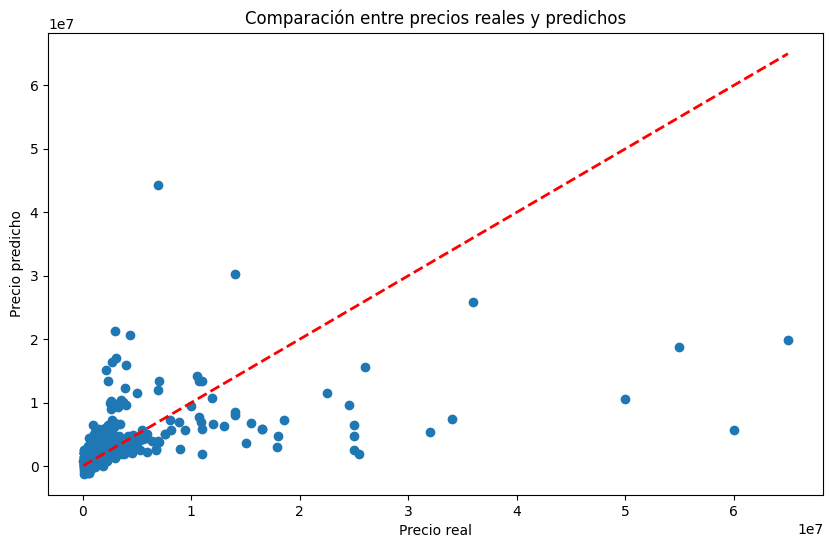

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre precios reales y predichos')
plt.show()

## Posible explicación:

- Puede haber relaciones no lineales entre las variables que una regresión lineal no captura.
- Podrían faltar variables importantes que influyen en el precio de las casas.
- Podría haber outliers o datos ruidosos que afectan el rendimiento del modelo.

## Pasos a seguir:
1. Explorar más a fondo los datos para entender mejor las relaciones entre variables.
2. Considerar la inclusión de más características relevantes si están disponibles.
3. Probar técnicas de preprocesamiento como la normalización o la eliminación de outliers.
4. Experimentar con modelos más complejos que puedan capturar relaciones no lineales.

# OTRO MODELO

Seleccionar características relevantes

# Random Forest

## Qué es

**Random Forest** es un algoritmo de aprendizaje supervisado que pertenece a la familia de métodos de conjunto (ensemble). Funciona creando múltiples árboles de decisión y combinando sus resultados para obtener una predicción más precisa y estable.

## Para qué sirve

1. Predicción: Puede utilizarse tanto para problemas de clasificación como de regresión.

2. Selección de características: Ayuda a identificar las variables más importantes en un conjunto de datos.

3. Manejo de datos faltantes: Es capaz de manejar eficientemente conjuntos de datos con valores faltantes.

4. Reducción del sobreajuste: Al combinar múltiples árboles, reduce el riesgo de sobreajuste común en los árboles de decisión individuales.

5. Estimación de la importancia de variables: Proporciona una medida de la importancia relativa de cada característica en la predicción.

## En qué casos se utiliza

Random Forest se aplica en diversos campos y situaciones, como:

1. Finanzas:
   - Detección de fraudes bancarios
   - Predicción de riesgos crediticios
   - Análisis de mercados financieros

2. Medicina y salud:
   - Diagnóstico de enfermedades
   - Predicción de la sensibilidad a medicamentos
   - Análisis de imágenes médicas

3. Marketing y comercio electrónico:
   - Predicción del comportamiento de los clientes
   - Segmentación de mercado
   - Recomendación de productos

4. Ciencias ambientales:
   - Predicción del clima
   - Análisis de patrones ecológicos
   - Evaluación de riesgos ambientales

5. Reconocimiento de imágenes y voz:
   - Clasificación de imágenes
   - Reconocimiento de patrones en señales de audio

6. Recursos humanos:
   - Predicción de la rotación de empleados
   - Evaluación del desempeño laboral

7. Industria y manufactura:
   - Predicción de fallos en equipos
   - Optimización de procesos de producción

**Random Forest** es especialmente útil cuando se trabaja con conjuntos de datos grandes y complejos, con muchas variables y posibles interacciones entre ellas. Su capacidad para manejar tanto variables numéricas como categóricas, así como su robustez frente al ruido en los datos, lo hacen una opción popular en muchos campos de aplicación.



In [38]:
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE','TYPE']
X = data[features]
y = data['PRICE']

In [39]:
# Codificar variables categóricas
X = pd.get_dummies(X, columns=['TYPE'])

In [40]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Forest Regressor, que puede capturar relaciones no lineales y manejar múltiples variables.

In [42]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Hacer predicciones
y_pred = rf_model.predict(X_test)


El MSE y R² ayudan a evaluar el rendimiento del modelo.

In [44]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'R-cuadrado: {r2}')

Error cuadrático medio: 9974277469753.936
R-cuadrado: 0.6041141874171588


Interpretación:

- Error cuadrático medio (MSE): 9974277469753.936

El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor más bajo indica mejores predicciones.

En este caso, el MSE es bastante alto, pero es **significativamente menor** que el obtenido con el modelo de regresión lineal anterior (19243479524898.84). Esto indica una mejora sustancial en la precisión de las predicciones. Sin embargo, el valor sigue siendo grande debido a la escala de los precios de las casas.

- R-cuadrado (R²): 0.6041141874171588

El R² indica qué proporción de la varianza en la variable dependiente (precio de venta) es predecible a partir de las variables independientes (características de la casa). Varía de 0 a 1, donde 1 indica una predicción perfecta.

Un R² de aproximadamente 0.604 significa que el modelo explica alrededor del 60.4% de la variabilidad en los precios de las casas. Esto es una mejora significativa respecto al modelo de regresión lineal anterior (que tenía un R² de 0.236).

Interpretación general:

1. Mejora significativa: El modelo Random Forest ha mejorado considerablemente respecto al modelo de regresión lineal anterior, tanto en términos de MSE como de R².
2. Poder predictivo moderado: El modelo puede explicar aproximadamente el 60% de la variabilidad en los precios de las casas, lo cual es bastante bueno para datos inmobiliarios que suelen ser complejos.
3. Margen de mejora: Aunque el modelo es mucho mejor, todavía hay un 40% de la variabilidad que no se explica, lo que sugiere que podrían existir otros factores importantes que no se están considerando o que la relación entre las variables podría ser aún más compleja.
4. Utilidad práctica: Con un R² de 0.604, el modelo puede ser útil para obtener estimaciones aproximadas de los precios de las casas, aunque no será perfecto en sus predicciones.
5. Complejidad del mercado inmobiliario: Los resultados reflejan la complejidad inherente al mercado inmobiliario, donde muchos factores, algunos difíciles de cuantificar, pueden influir en los precios.

En resumen, el modelo Random Forest ha proporcionado una mejora sustancial en la capacidad predictiva comparado con el modelo de regresión lineal anterior. Sin embargo, aún hay margen para mejorar, posiblemente mediante la inclusión de más variables relevantes, el ajuste de hiperparámetros del modelo, o la consideración de otros algoritmos de aprendizaje automático.

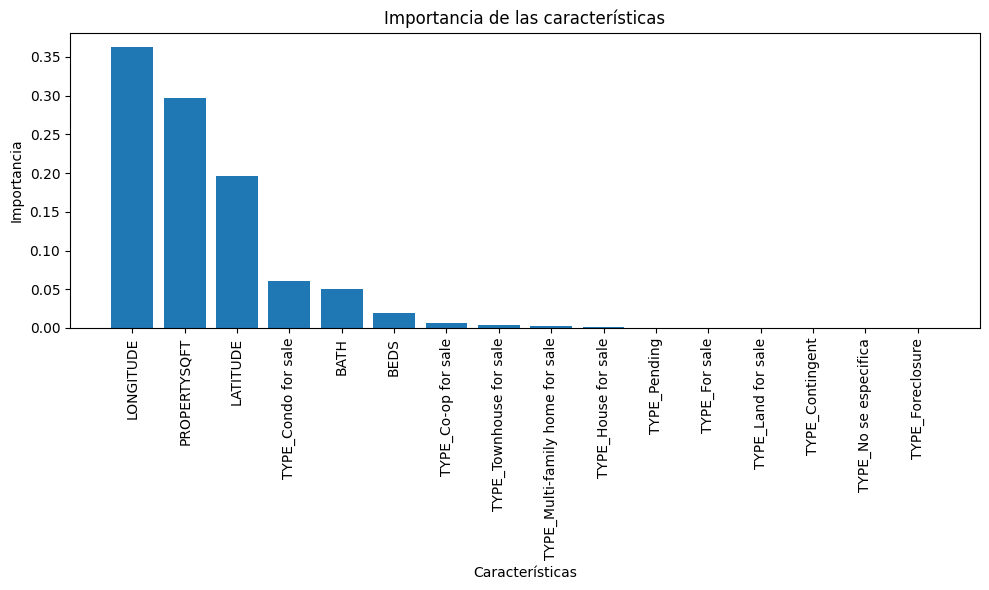

In [45]:
# Visualizar la importancia de las características
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()